In [2]:
import numpy as np
import cv2
import sys 

import matplotlib.pyplot as plt
import os

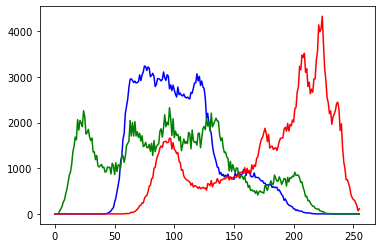

In [15]:
src = cv2.imread('./fig/lenna.bmp', cv2.IMREAD_COLOR)

# cv2.calcHist()
# images : 입체영상 리스트(리스트 형식으로 입력)
# channels : 채널리스트, 3 채널의 경우 [0, 1, 2]
# mask : 마스크 영상입력, 영상전체는 None으로 지정
# histSize : 히스토그램 빈의 크기
# range : 히스토그램 min, max값
# hist : 계산된 히스토그램
# accumulate : 기존의 히스토그림을 누적할 경우 True
hist_b = cv2.calcHist([src], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([src], [1], None, [256], [0, 256])
hist_r = cv2.calcHist([src], [2], None, [256], [0, 256])

#print(hist)
#print(hist.shape)

cv2.imshow('src', src)
plt.plot(hist_b, c = 'b', label = 'blue channel')
plt.plot(hist_g, c = 'g', label = 'green channel')
plt.plot(hist_r, c = 'r', label = 'red channel')

plt.show()

cv2.waitKey()
cv2.destroyAllWindows()

In [23]:
def getGrayHistImage(hist):
    
    # 비어있는 하얀 창 생성, 200, 256 (h, w) numpy 좌표계로 생성
    imgHist = np.full((200, 256), 255, np.uint8)

    print(imgHist.shape) # (200, 256)
    histMax = np.max(hist)

    
    for x in range(256):
        # x가 1씩 증가하므로, 수학 좌표계로는 (x, 0)
        # 그러나 opencv에서는 왼쪽 위가 (0, 0)이기 때문에 
        # imgae height값(200)이 수학 좌표의 0이 된다.   
        pt1 = (x, 200) 
        # y를 200 등분한다. histmax로 나눴으나,
        # y가 200보다 클 수 없다.
        pt2 = (x, 200 - int(hist[x, 0]*200/histMax)) 
        cv2.line(imgHist, pt1, pt2, 0)  # 직선으로 선이 이어진다.
        
    return imgHist
        
# 사진 크기는 256 * 256 (w, h)
src = cv2.imread('./fig/lenna.bmp', cv2.IMREAD_GRAYSCALE)

hist = cv2.calcHist([src], [0], None, [256], [0, 256])
#print(hist)
print(hist.shape)  # (256, 1) 크기
histImg = getGrayHistImage(hist)

cv2.imshow('src', src)
cv2.imshow('histImg', histImg)



cv2.waitKey()
cv2.destroyAllWindows()

(256, 1)
(200, 256)


In [2]:
import numpy as np
import cv2
import sys

import matplotlib.pyplot as plt

# 히스토그램 노멀라이저

src = cv2.imread('./fig/manjang.jpg', cv2.IMREAD_REDUCED_GRAYSCALE_2)

smin, smax, _, _ = cv2.minMaxLoc(src)

print(smin, smax, _,)

# 클리핑 (0, 255) 범위로 값 조절
dst_norm_cv = cv2.normalize(src, None, 0, 255, cv2.NORM_MINMAX, -1)
dst_norm = np.clip(255*(src - smin)/(smax-smin) + 0, 0, 255).astype(np.uint8)
dst_equal = cv2.equalizeHist(src)

cv2.imshow('src', src)
cv2.imshow('dst_norm', dst_norm)
cv2.imshow('dst_norm_cv', dst_norm_cv)
cv2.imshow('dst_equal', dst_equal)


src_hist = cv2.calcHist([src], [0], None, [256], [0, 256])

plt.plot(src_hist)
plt.show()

cv2.waitKey()
cv2.destroyAllWindows()

100.0 184.0 (369, 80)


AttributeError: module 'cv2' has no attribute 'COLOR_BGRA2YCrCb'

0.0 230.0 (2, 152)


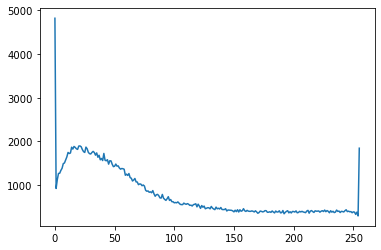

In [3]:
# 칼라사진(alpha 값 있는 png)를 노멀라이저, 이퀄라이저 해보기
import numpy as np
import cv2
import sys

import matplotlib.pyplot as plt

# 히스토그램 노멀라이저

src = cv2.imread('./fig/flowers.jpg', 1)

# 가우시안 블러 사용 \
blur= cv2.GaussianBlur(src, (0, 0), 3)
shirink = np.clip(125*(src - smin)/(smax-smin) + 0, 0, 255).astype(np.uint8)
shirink2 = np.clip(src*0.3 + 0, 0, 255).astype(np.uint8)
shirink3 = cv2.normalize(src, None, 100, 200, cv2.NORM_MINMAX, -1)
smin, smax, _, _ = cv2.minMaxLoc(shirink[3])

print(smin, smax, _,)

# 클리핑 (0, 255) 범위로 값 조절

dst_norm = np.clip(255*(shirink - smin)/(smax-smin) + 0, 0, 255).astype(np.uint8)
dst_norm_cv = cv2.normalize(shirink, None, 0, 255, cv2.NORM_MINMAX, -1)

# convert from RGB color-space to YCrCb
ycrcb_img = cv2.cvtColor(shirink, cv2.COLOR_BGR2YCrCb)

# equalize the histogram of the Y channel
ycrcb_img[:, :, 0] = cv2.equalizeHist(ycrcb_img[:, :, 0])

# convert back to RGB color-space from YCrCb
dst_equal = cv2.cvtColor(ycrcb_img, cv2.COLOR_YCrCb2BGR)


cv2.imshow('src', src)
cv2.imshow('blur', blur)
cv2.imshow('shirink', shirink)
cv2.imshow('shirink2', shirink2)
cv2.imshow('shirink3', shirink3)
cv2.imshow('dst_norm', dst_norm)
cv2.imshow('dst_norm_cv', dst_norm_cv)
cv2.imshow('dst_equal', dst_equal)


src_hist = cv2.calcHist([src], [0], None, [256], [0, 256])

plt.plot(src_hist)
plt.show()

cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
# 칼라사진(alpha 값 있는 png)를 HSV 방식으로 노멀라이저, 이퀄라이저 해보기
import numpy as np
import cv2
import sys

import matplotlib.pyplot as plt

src = cv2.imread('./fig/manjang.jpg', cv2.IMREAD_UNCHANGED)
src = cv2.resize(src, dsize=(640, 480), interpolation=cv2.INTER_AREA)

src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

h, s, v = cv2.split(src_hsv)

norm = cv2.normalize(v, None, 0, 255, cv2.NORM_MINMAX, -1)
equal = cv2.equalizeHist(v)
src_Gaussian = cv2.GaussianBlur(equal, (0, 0), 2)

src_norm = cv2.merge((h, s, norm))
src_equal = cv2.merge((h, s, equal))
src_Gaussian = cv2.merge((h, s, src_Gaussian))

src_norm = cv2.cvtColor(src_norm, cv2.COLOR_HSV2BGR)
src_equal = cv2.cvtColor(src_equal, cv2.COLOR_HSV2BGR)
src_Gaussian = cv2.cvtColor(src_Gaussian, cv2.COLOR_HSV2BGR)

cv2.imshow('src', src)
cv2.imshow('src_norm', src_norm)
cv2.imshow('src_equal', src_equal)
cv2.imshow('src_Gaussian', src_Gaussian)


cv2.waitKey()
cv2.destroyAllWindows()